In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Defining the dimensions and vector g (potential vector - an array of 5000 ones)

In [ ]:
n= 50 #horizontal segments
m= 50 #vertical segments
length= 15 #length of plate
breadth = 15 #breadth of plate
area_of_segment= (length/n)*(breadth/m)
potential_vector=np.ones(n*m) # Assuming the potential to be 1

# Consider 1 surface
Finding the charge distribution for an isolated equipotential plate.

In [ ]:
L = [] # The final L matrix
k = 9000000000
# size of segments
c = length/n
d = length/m

for i in range(m*n):  #since i and j begin from zero, we consider that the bottom-left corner of the plate is 1/2 units offset from the origin in both x and y direction
  l=[]
  for j in range(n*m):
        xi=(i//n)+1
        yi=i%n
        xj=(j//m)+1
        yj=j%m
        if xi!=xj or yi!=yj:
          distance=((xi-xj)**2 + (yi-yj)**2)**(1/2)
          l.append(k*area_of_segment/distance)
        if xi==xj and yi==yj: # self potential
          l.append(k*np.log(1+np.sqrt(1.414))*4*np.sqrt(c*d))
  L.append(l)
solutions = np.linalg.solve(L, potential_vector)

# Performing Gauss Jordan Elimination


In [ ]:
def gauss_jordan_elimination(matrix, n):
    for i in range(n):
        if(matrix[i][i]==0):
            for j in range(i+1,n):
                if(matrix[j][i]!=0):
                    matrix[i][i],matrix[j][i] = matrix[j][i],matrix[i][i]
                    break
            else:
                print("Infinite solutions")
                return "Infinite solutions"
    return gauss_elimination(matrix,n,0)


def gauss_elimination(matrix, n, r):
    if(r==n):
        return backward_elimination(matrix, n, n-1)

    p = matrix[r][r]
    for i in range(r,n+1):
        matrix[r][i]/=p

    for i in range(r+1,n):
        p = matrix[i][r]
        for j in range(r,n+1):
            matrix[i][j] -= matrix[r][j]*p

    return gauss_elimination(matrix, n, r+1)

def backward_elimination(matrix, n, r):
    if(r==-1):
        return [row[-1] for row in matrix]

    for i in range(r-1,-1,-1):
        p = matrix[i][r]
        for j in range(r,n+1):
            matrix[i][j] -= matrix[r][j]*p
    return backward_elimination(matrix, n, r-1)


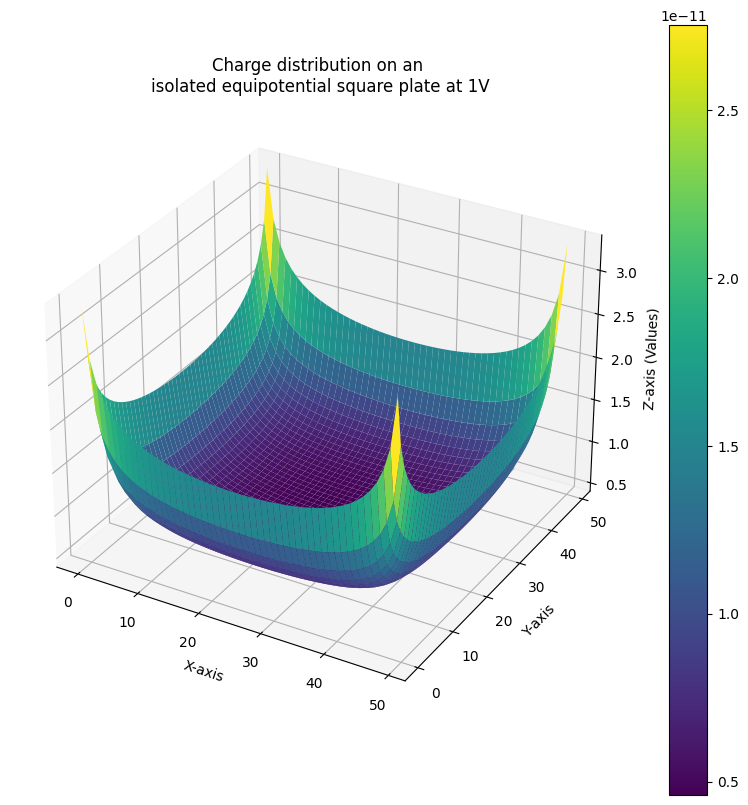

In [ ]:
array=np.array(solutions)
data=array.reshape(n,m)

# Create a
# grid of X and Y values
x = np.arange(0, data.shape[1])
y = np.arange(0, data.shape[0])
X, Y = np.meshgrid(x, y)
Z = data
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add a colorbar to indicate values
fig.colorbar(surf)

# Label axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (Values)')
ax.set_title("Charge distribution on an \nisolated equipotential square plate at 1V")

# Show the plot
plt.show()

# Start the following code from a new page

## Consider 2 parallel surfaces
We assume the potential of both the surfaces to be 1

Calculating the L matrix

In [ ]:
import numpy as np
L = []
k = 9000000000
c = length/n
d = length/m
z2 = 15
z1 = 0
eps = 8.854187817*(10**-12)

for i in range(m*n):
  l=[]
  for j in range(n*m): # Finding L11
        xi=(i//n)+1
        yi=i%n
        xj=(j//m)+1
        yj=j%m
        if xi!=xj or yi!=yj:
          distance=((xi-xj)**2 + (yi-yj)**2)**(1/2)
          l.append(k*area_of_segment/distance)
        if xi==xj and yi==yj:
          l.append(k*np.log(1+np.sqrt(1.414))*4*np.sqrt(c*d))
  for j in range(n*m): # Finding L12
        xi=(i//n)+1
        yi=i%n
        xj=(j//m)+1
        yj=j%m
        if xi!=xj or yi!=yj:
          distance=((xi-xj)**2 + (yi-yj)**2 + (z2-z1)**2)**(1/2)
          l.append(k*area_of_segment/distance)
        if xi==xj and yi==yj:
          l.append((0.282*c/eps)*(np.sqrt(1+(np.pi*(z2-z1)**2))/(c*d) - np.pi*(z2-z1)/c))
  L.append(l)

for i in range(m*n):
  l=[]
  for j in range(n*m): # Finding L21
        xi=(i//n)+1
        yi=i%n
        xj=(j//m)+1
        yj=j%m
        if xi!=xj or yi!=yj:
          distance=((xi-xj)**2 + (yi-yj)**2 + (z2-z1)**2)**(1/2)
          l.append(k*area_of_segment/distance)
        if xi==xj and yi==yj:
          l.append((0.282*c/eps)*(np.sqrt(1+(np.pi*(z2-z1)**2))/(c*d) - np.pi*(z2-z1)/c))

  for j in range(n*m): # Finding L22
        xi=(i//n)+1
        yi=i%n
        xj=(j//m)+1
        yj=j%m
        if xi!=xj or yi!=yj:
          distance=((xi-xj)**2 + (yi-yj)**2)**(1/2)
          l.append(k*area_of_segment/distance)
        if xi==xj and yi==yj:
          l.append(k*np.log(1+np.sqrt(1.414))*4*np.sqrt(c*d))
  L.append(l)

p_v is the potential vector (an array of 5000 ones)

In [ ]:
p_v = []
for i in range(2500):
  p_v.append(1)
for i in range(2500):
  p_v.append(1)
solutions = np.linalg.solve(L, p_v)

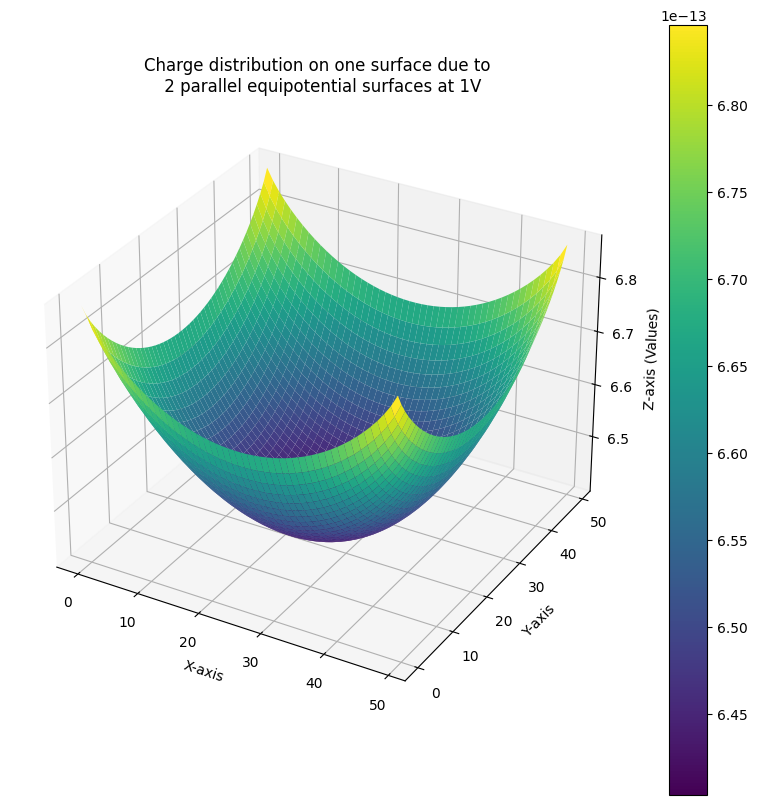

In [ ]:
arr1 = []
for i in range(2500):
  arr1.append(solutions[i])
arr1 = np.array(arr1)
arr1.shape
data=arr1.reshape((n,m))
data.shape
import seaborn as sns
import matplotlib.pyplot as plt
# Find the minimum and maximum values
min_val = data.min()
max_val = data.max()

normalized_data = data
# Create a grid of X and Y values
x = np.arange(0, normalized_data.shape[1])
y = np.arange(0, normalized_data.shape[0])
X, Y = np.meshgrid(x, y)
Z = normalized_data
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add a colorbar to indicate values
fig.colorbar(surf)

# Label axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (Values)')
ax.set_title("Charge distribution on one surface due to \n 2 parallel equipotential surfaces at 1V")

# Show the plot
plt.show()

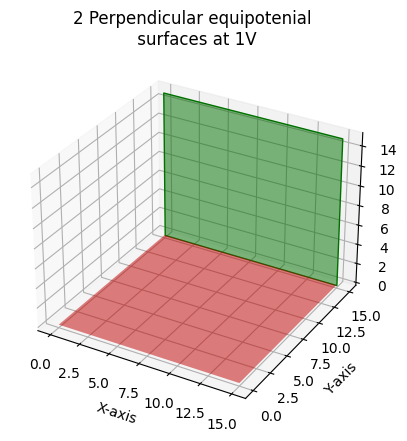

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define your data
x1 = np.linspace(0, 15, 50)
y1 = np.linspace(0, 15, 50)
z1 = np.zeros_like(x1)  # z is set to zero for the first plane

# Create a meshgrid for the x-y and x-z planes
X, Y = np.meshgrid(x1, y1)
Z = np.zeros_like(X)  # z is set to zero for the first plane

# Define the second plane
x2 = np.linspace(0, 15, 50)
z2 = np.linspace(0, 15, 50)
y2 = 15.001 * np.ones_like(x2)  # y is set to a constant value for the second plane

# Create a meshgrid for the second plane
X2, Z2 = np.meshgrid(x2, z2)
Y2 = 15.001 * np.ones_like(X2)  # y is set to a constant value for the second plane

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first plane
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, color='r', label='Plane 1')

# Plot the second plane
ax.plot_surface(X2, Y2, Z2, alpha=0.5, facecolors='g', rstride=100, cstride=100, label='Plane 2')

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title("2 Perpendicular equipotenial \n surfaces at 1V")

# Show the plot
plt.show()


Calculating the L matrix

In [ ]:
import numpy as np
L = []
k = 9000000000
eps = 8.854187817*(10**-12)

for i1 in range(50):
  for j1 in range(50):
    l=[]
    for i2 in range(50):
      for j2 in range(50):
        if X[i1][j1]!=X[i2][j2] or Y[i1][j1]!=Y[i2][j2]:
          distance=((X[i1][j1]-X[i2][j2])**2 + (Y[i1][j1]-Y[i2][j2])**2)**(1/2)
          l.append(k*area_of_segment/distance)
        else:
          l.append(k*np.log(1+np.sqrt(1.414))*4*np.sqrt(c*d))


    for i2 in range(50):
      for j2 in range(50):
        distance=((X[i1][j1]-X2[i2][j2])**2 + (Y[i1][j1]-Y2[i2][j2])**2 + (Z[i1][j1]-Z2[i2][j2])**2)**(1/2)
        l.append(k*area_of_segment/distance)
    L.append(l)

for i1 in range(50):
  for j1 in range(50):
    l=[]
    for i2 in range(50):
      for j2 in range(50):
        distance=((X2[i1][j1]-X[i2][j2])**2 + (Y2[i1][j1]-Y[i2][j2])**2 + (Z2[i1][j1]-Z[i2][j2])**2)**(1/2)
        l.append(k*area_of_segment/distance)

    for i2 in range(50):
      for j2 in range(50):
        if Y2[i1][j1]!=Y2[i2][j2] or Z2[i1][j1]!=Z2[i2][j2]:
          distance=((X2[i1][j1]-X2[i2][j2])**2 + (Y2[i1][j1]-Y2[i2][j2])**2 + (Z2[i1][j1]-Z2[i2][j2])**2)**(1/2)
          l.append(k*area_of_segment/distance)
        else:
          l.append(k*np.log(1+np.sqrt(1.414))*4*np.sqrt(c*d))

    L.append(l)

The g vector (p_v)

In [ ]:
p_v = []
for i in range(2500):
  p_v.append(1)
for i in range(2500):
  p_v.append(1)
solutions = np.linalg.solve(L, p_v)

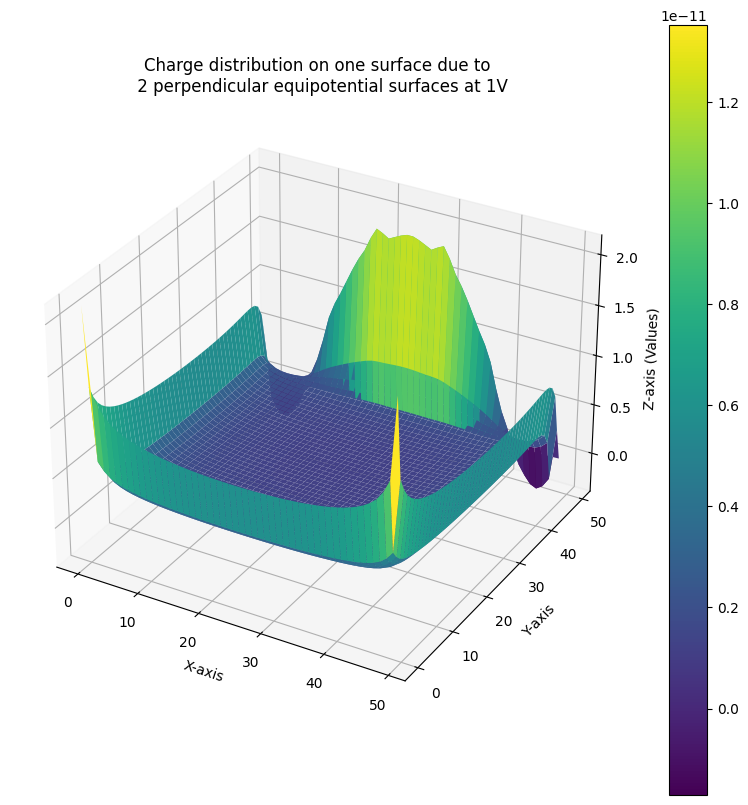

In [ ]:
arr1 = []
for i in range(2500):
  arr1.append(solutions[i])
arr1 = np.array(arr1)
n = 50
m = 50
data=arr1.reshape((n,m))
data.shape
import seaborn as sns
import matplotlib.pyplot as plt
# Create a grid of X and Y values
x = np.arange(0, data.shape[1])
y = np.arange(0, data.shape[0])
X, Y = np.meshgrid(x, y)
Z = data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add a colorbar to indicate values
fig.colorbar(surf)

# Label axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (Values)')
ax.set_title("Charge distribution on one surface due to \n 2 perpendicular equipotential surfaces at 1V")

# Show the plot
plt.show()

## Dimension
1.65 1.53 3

L B H

meters

ISRO I2K bass

## We used

Pulse basis - alpha

Point matching -

Weighting function